<a href="https://colab.research.google.com/github/amypim/PUBG/blob/main/SR_VAR_pct_yoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 4.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [5]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

Saving data.csv to data.csv


In [6]:
data.set_index('month', inplace=True)
data.head()

,BTC,SP500,NDXT,EFFR,CPI,OIL,GOLD,REALEST,TWEETS,GOOGLE
month,,,,,,,,,,
ม.ค.-12,5.27,1300.58,NaN,0.08,227.84,100.27,1744.00,178.62,NaN,0.5
ก.พ.-12,6.08,1352.49,1494.32,0.10,228.33,102.20,1770.00,179.03,NaN,0.5
มี.ค.-12,4.92,1389.24,1514.74,0.13,228.81,106.16,1662.50,180.57,NaN,0.5
เม.ย.-12,4.83,1386.43,1488.04,0.14,229.19,103.32,1651.25,181.51,NaN,0.5
พ.ค.-12,5.00,1341.27,1373.11,0.16,228.71,94.66,1558.00,182.61,NaN,0.5


In [23]:
data.describe()

count    80.000000
mean      0.001584
std       0.005433
min      -0.007693
25%      -0.001615
50%       0.000470
75%       0.003869
max       0.022674
Name: pct_yoy_REALEST, dtype: float64

CLEAN AND NORMALIZE DATA

In [7]:
#remove null data
df=data
df = df[(df.BTC          .notnull())
        & (df.SP500        .notnull())
		& (df.NDXT         .notnull())
		& (df.EFFR		 .notnull())
        & (df.CPI          .notnull())
		& (df.OIL          .notnull())
		& (df.GOLD         .notnull())
        & (df.REALEST      .notnull())
		& (df.TWEETS   .notnull())
		& (df.GOOGLE	 .notnull())]
df.describe()

,BTC,SP500,NDXT,EFFR,CPI,OIL,GOLD,REALEST,TWEETS,GOOGLE
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.00000,93.000000,93.000000,9.300000e+01,93.000000
mean,9836.289570,2737.526129,4293.980645,0.780108,249.869570,56.82914,1398.263441,259.613333,1.270176e+06,16.225806
std,15175.273657,743.082148,2094.478545,0.821084,11.500739,16.80824,249.709325,42.383282,9.946283e+05,17.739742
min,223.310000,1864.260000,1979.980000,0.050000,234.750000,16.55000,1060.000000,204.120000,1.231690e+05,2.000000
25%,536.420000,2094.140000,2380.090000,0.090000,238.080000,46.63000,1217.550000,225.260000,6.595860e+05,3.000000
50%,4394.640000,2652.390000,3944.800000,0.380000,249.440000,54.45000,1291.000000,254.370000,8.607180e+05,12.000000
75%,9564.950000,2996.110000,5125.840000,1.510000,257.310000,63.86000,1584.200000,281.580000,1.299732e+06,20.000000
max,60955.770000,4674.770000,9638.290000,2.420000,280.130000,105.79000,1964.900000,367.220000,4.292963e+06,100.000000


In [8]:
#create %yoy dataframe
df_yoy = pd.DataFrame()
for i in df.columns:
  df_yoy[i] = df[i].pct_change(12)

In [9]:
#remove null data
df_yoy = df_yoy[(df_yoy.BTC          .notnull())
        & (df_yoy.SP500        .notnull())
		& (df_yoy.NDXT         .notnull())
		& (df_yoy.EFFR		 .notnull())
        & (df_yoy.CPI          .notnull())
		& (df_yoy.OIL          .notnull())
		& (df_yoy.GOLD         .notnull())
        & (df_yoy.REALEST      .notnull())
		& (df_yoy.TWEETS   .notnull())
		& (df_yoy.GOOGLE	 .notnull())]
print(df_yoy)

               BTC     SP500      NDXT      EFFR       CPI       OIL  \
month                                                                  
เม.ย.-15 -0.484981  0.123695  0.205189  0.333333 -0.001057 -0.466543   
พ.ค.-15  -0.491266  0.117565  0.206292  0.333333  0.000338 -0.419945   
มิ.ย.-15 -0.644987  0.078168  0.135046  0.300000  0.001813 -0.434540   
ก.ค.-15  -0.594613  0.061345  0.055689  0.444444  0.002232 -0.508640   
ส.ค.-15  -0.529408  0.039938  0.026416  0.555556  0.002400 -0.555935   
...            ...       ...       ...       ...       ...       ...   
ส.ค.-21   2.512580  0.313264  0.391593 -0.100000  0.052046  0.599669   
ก.ย.-21   3.082255  0.320907  0.426453 -0.111111  0.053884  0.807974   
ต.ค.-21   3.532278  0.304797  0.347535 -0.111111  0.062378  1.068020   
พ.ย.-21   3.428969  0.315132  0.398704 -0.111111  0.068272  0.933317   
ธ.ค.-21   2.045385  0.265055  0.272984 -0.111111  0.070997  0.525096   

              GOLD   REALEST    TWEETS    GOOGLE  
month       

In [10]:
df_yoy.describe()

,BTC,SP500,NDXT,EFFR,CPI,OIL,GOLD,REALEST,TWEETS,GOOGLE
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.971789,0.125712,0.235460,0.586384,0.020340,0.081181,0.063594,0.077047,0.724472,1.299803
std,2.848016,0.121396,0.185606,0.994067,0.015010,0.522008,0.127423,0.040956,1.245223,2.880502
min,-0.711501,-0.085381,-0.116735,-0.979339,-0.001057,-0.740839,-0.145380,0.047833,-0.859296,-0.870000
25%,0.224168,0.040550,0.063529,-0.111111,0.011726,-0.237314,-0.036764,0.054736,-0.308552,-0.062500
50%,1.168869,0.127806,0.243279,0.555556,0.018143,-0.006596,0.036914,0.060597,0.404519,0.333333
75%,2.636552,0.170564,0.392412,1.250000,0.023535,0.297493,0.169212,0.068185,1.628794,1.500000
max,13.416749,0.499352,0.668079,2.454545,0.070997,2.729305,0.376414,0.193427,3.770508,19.000000


In [11]:
#rename columns
df_yoy=df_yoy.rename(columns={   "BTC" : "pct_yoy_BTC"
, "SP500"      : "pct_yoy_SP500"     
,"NDXT"       : "pct_yoy_NDXT"    
,"EFFR"       : "pct_yoy_EFFR"
,"CPI"        : "pct_yoy_CPI"       
,"OIL"        : "pct_yoy_OIL"       
,"GOLD"       : "pct_yoy_GOLD"      
,"REALEST"    : "pct_yoy_REALEST"   
,"TWEETS" : "pct_yoy_TWEETS"
,"GOOGLE" : "pct_yoy_GOOGLE"
})

CORRELATION MATRIX

In [12]:
#corr matrix for original data
# rs = np.random.RandomState(0)
corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm')



mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='RdYlGn', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  from ipykernel import kernelapp as app


,BTC,SP500,NDXT,EFFR,CPI,OIL,GOLD,REALEST,TWEETS,GOOGLE
BTC,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
SP500,0.90,nan,nan,nan,nan,nan,nan,nan,nan,nan
NDXT,0.89,0.99,nan,nan,nan,nan,nan,nan,nan,nan
EFFR,-0.20,-0.00,-0.04,nan,nan,nan,nan,nan,nan,nan
CPI,0.84,0.98,0.97,0.12,nan,nan,nan,nan,nan,nan
OIL,0.22,0.10,0.06,0.02,0.06,nan,nan,nan,nan,nan
GOLD,0.72,0.85,0.88,-0.24,0.84,-0.06,nan,nan,nan,nan
REALEST,0.87,0.99,0.99,0.02,0.99,-0.01,0.86,nan,nan,nan
TWEETS,0.87,0.76,0.74,-0.28,0.67,0.19,0.55,0.72,nan,nan
GOOGLE,0.68,0.65,0.65,0.01,0.60,0.09,0.53,0.63,0.78,nan


In [13]:
#corr matrix for %yoy data
# rs = np.random.RandomState(0)
corr = df_yoy.corr()
# corr.style.background_gradient(cmap='coolwarm')



mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='RdYlGn', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#ffffff')  # Color NaNs grey
 .set_precision(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  from ipykernel import kernelapp as app


,pct_yoy_BTC,pct_yoy_SP500,pct_yoy_NDXT,pct_yoy_EFFR,pct_yoy_CPI,pct_yoy_OIL,pct_yoy_GOLD,pct_yoy_REALEST,pct_yoy_TWEETS,pct_yoy_GOOGLE
pct_yoy_BTC,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
pct_yoy_SP500,0.51,nan,nan,nan,nan,nan,nan,nan,nan,nan
pct_yoy_NDXT,0.53,0.87,nan,nan,nan,nan,nan,nan,nan,nan
pct_yoy_EFFR,0.22,-0.28,-0.26,nan,nan,nan,nan,nan,nan,nan
pct_yoy_CPI,0.36,0.72,0.49,-0.12,nan,nan,nan,nan,nan,nan
pct_yoy_OIL,0.49,0.82,0.64,0.00,0.78,nan,nan,nan,nan,nan
pct_yoy_GOLD,-0.01,-0.09,0.13,-0.41,-0.20,-0.21,nan,nan,nan,nan
pct_yoy_REALEST,0.28,0.76,0.54,-0.38,0.79,0.65,-0.09,nan,nan,nan
pct_yoy_TWEETS,0.52,0.58,0.51,-0.26,0.34,0.32,-0.08,0.62,nan,nan
pct_yoy_GOOGLE,0.84,0.29,0.40,0.22,0.12,0.16,0.04,0.10,0.57,nan


TEST BEFORE DOING VAR

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

This is the basic premise on which Vector Autoregression(VAR) models is based on. So, it’s fairly common to implement the cointegration test before starting to build VAR models.

Cointegration tests: Engle-Granger and the Johansen Test

In [14]:
#Johansen test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_yoy)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
pct_yoy_BTC ::  890.82    > 219.4051  =>   True
pct_yoy_SP500 ::  694.49    > 179.5199  =>   True
pct_yoy_NDXT ::  500.94    > 143.6691  =>   True
pct_yoy_EFFR ::  358.47    > 111.7797  =>   True
pct_yoy_CPI ::  245.52    > 83.9383   =>   True
pct_yoy_OIL ::  136.22    > 60.0627   =>   True
pct_yoy_GOLD ::  85.74     > 40.1749   =>   True
pct_yoy_REALEST ::  51.61     > 24.2761   =>   True
pct_yoy_TWEETS ::  23.85     > 12.3212   =>   True
pct_yoy_GOOGLE ::  2.81      > 4.1296    =>   False


In [15]:
#Granger test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_yoy, variables = df_yoy.columns)   
#p-value<0.05 then they are causing each other(reject the null hypothesis)
#out of 100: 59<0.05 and 41>0.05

,pct_yoy_BTC_x,pct_yoy_SP500_x,pct_yoy_NDXT_x,pct_yoy_EFFR_x,pct_yoy_CPI_x,pct_yoy_OIL_x,pct_yoy_GOLD_x,pct_yoy_REALEST_x,pct_yoy_TWEETS_x,pct_yoy_GOOGLE_x
pct_yoy_BTC_y,1.0000,0.2041,0.0064,0.0435,0.4296,0.0424,0.1230,0.0412,0.0000,0.0000
pct_yoy_SP500_y,0.6278,1.0000,0.0162,0.0897,0.0000,0.1991,0.0025,0.0000,0.0000,0.1865
pct_yoy_NDXT_y,0.5759,0.0051,1.0000,0.0136,0.0052,0.1521,0.0040,0.0080,0.0000,0.4292
pct_yoy_EFFR_y,0.5578,0.0034,0.0676,1.0000,0.0282,0.2969,0.0000,0.0595,0.5363,0.4233
pct_yoy_CPI_y,0.1653,0.0000,0.0006,0.2758,1.0000,0.0001,0.0251,0.0000,0.0011,0.3247
pct_yoy_OIL_y,0.3099,0.0000,0.0034,0.0091,0.0019,1.0000,0.0666,0.0000,0.0211,0.1907
pct_yoy_GOLD_y,0.2628,0.0365,0.0233,0.0237,0.2663,0.0530,1.0000,0.0348,0.1106,0.2018
pct_yoy_REALEST_y,0.0020,0.0000,0.0001,0.0008,0.0000,0.0000,0.0000,1.0000,0.0459,0.1891
pct_yoy_TWEETS_y,0.0096,0.0264,0.0036,0.0149,0.3673,0.4007,0.0004,0.0066,1.0000,0.0156
pct_yoy_GOOGLE_y,0.0000,0.3435,0.0513,0.0012,0.1590,0.0442,0.3222,0.4774,0.0376,1.0000


Stationary test: adf test

In [16]:
#create def for adf
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s

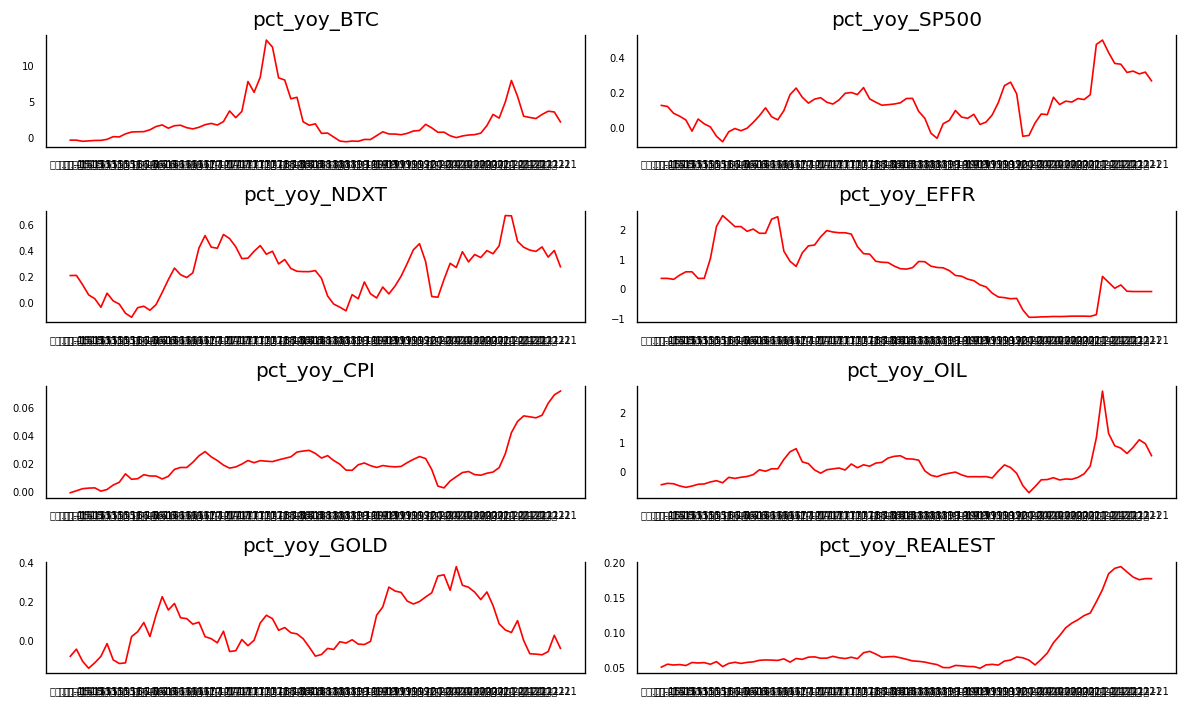

In [17]:
# Plot df_yoy
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_yoy[df_yoy.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_yoy.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();
#Actual Multi Dimensional Time Series for VAR model

In [18]:
#adf for df_yoy
for name, column in df_yoy.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "pct_yoy_BTC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8918
 No. Lags Chosen       = 3
 Critical value 1%     = -3.518
 Critical value 5%     = -2.9
 Critical value 10%    = -2.587
 => P-Value = 0.0463. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pct_yoy_SP500" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1061
 No. Lags Chosen       = 12
 Critical value 1%     = -3.53
 Critical value 5%     = -2.905
 Critical value 10%    = -2.59
 => P-Value = 0.7126. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "pct_yoy_NDXT" 
    -----------------------------------------------
 Null Hypothesis: Data has unit roo

MAKING DATA STATIONARY

In [19]:
# ADF Test on each column of 1st Differences Dataframe
df_differenced = df_yoy.diff().dropna()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s

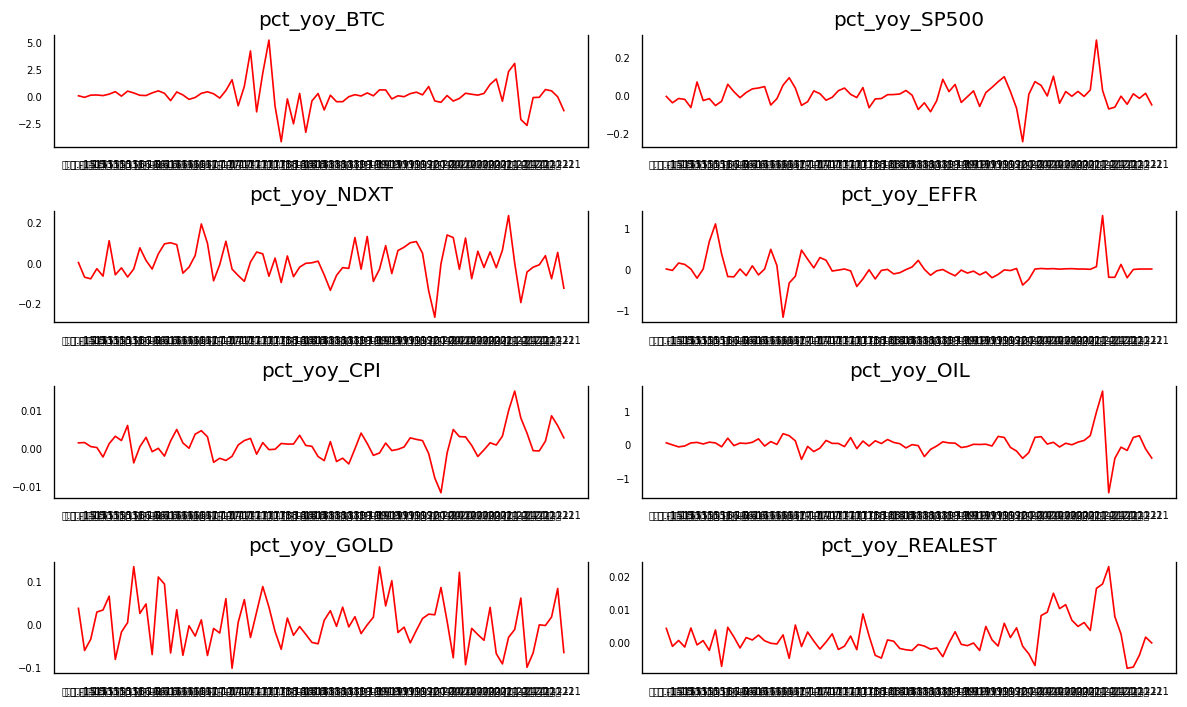

In [20]:
# Plot df_differenced
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_differenced[df_differenced.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_differenced.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();
#Actual Multi Dimensional Time Series for VAR model

In [21]:
#adf for df_differenced
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
#only ln_REALEST is not stationary --> it's ok --> can use diff1

    Augmented Dickey-Fuller Test on "pct_yoy_BTC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.922
 No. Lags Chosen       = 2
 Critical value 1%     = -3.518
 Critical value 5%     = -2.9
 Critical value 10%    = -2.587
 => P-Value = 0.0019. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pct_yoy_SP500" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.1653
 No. Lags Chosen       = 11
 Critical value 1%     = -3.53
 Critical value 5%     = -2.905
 Critical value 10%    = -2.59
 => P-Value = 0.0008. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pct_yoy_NDXT" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sig

CHOOSE LAG

In [22]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
  #AIC drop most at 1 and then come up so use lag=1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag Order = 1
AIC :  -46.17733134903377
BIC :  -42.87810016205437
FPE :  8.981484036060224e-21
HQIC:  -44.85555839528105 

Lag Order = 2
AIC :  -46.12311726346995
BIC :  -39.77813196084413
FPE :  1.066790955142809e-20
HQIC:  -43.583103100125726 

Lag Order = 3
AIC :  -45.85659413453592
BIC :  -36.42049438421589
FPE :  1.970048141474854e-20
HQIC:  -42.082237130286174 

Lag Order = 4
AIC :  -46.16415486934701
BIC :  -33.59046184938127
FPE :  3.210196144262627e-20
HQIC:  -41.13909894739892 

Lag Order = 5
AIC :  -47.92452499271714
BIC :  -32.16560582067023
FPE :  3.032713105395902e-20
HQIC:  -41.63216161265889 

Lag Order = 6
AIC :  -55.3598236562634
BIC :  -36.36685464471551
FPE :  9.150569455165085e-22
HQIC:  -47.78329480640351 

Lag Order = 7


LinAlgError: ignored

VAR REGRESSION

In [24]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 14, Apr, 2022
Time:                     16:56:34
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -42.8781
Nobs:                     79.0000    HQIC:                  -44.8556
Log likelihood:           813.043    FPE:                8.98148e-21
AIC:                     -46.1773    Det(Omega_mle):     2.43890e-21
--------------------------------------------------------------------
Results for equation pct_yoy_BTC
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.070737         0.130249            0.543           0.587
L1.pct_yoy_BTC            -0.325711         0.124988           -2.606           0.009
L1.pct_yoy_SP500           6.47885

IMPULSE RESPONSE FUNCTION

Figure(720x1800)


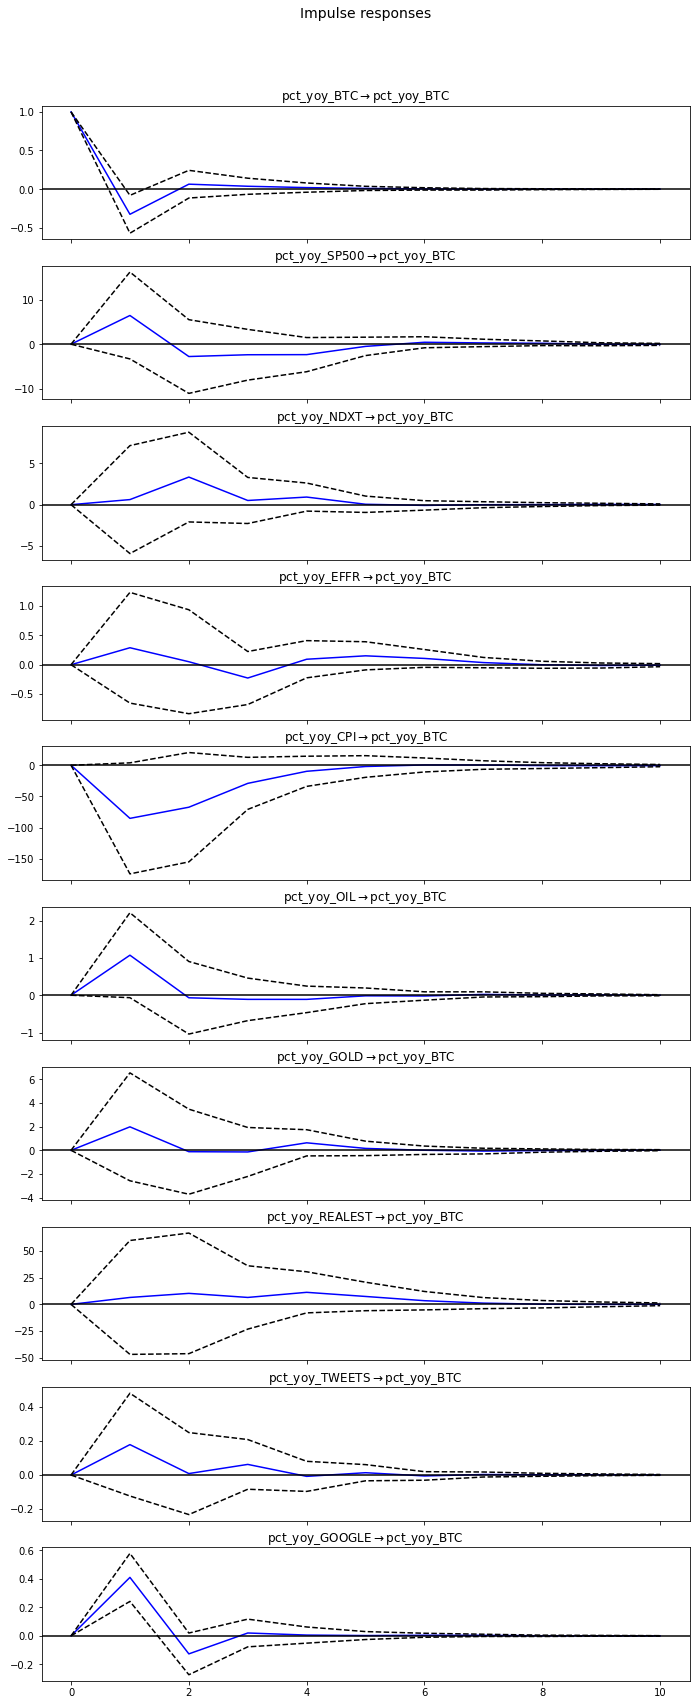

In [25]:
irf = model_fitted.irf(10)
irf_plot=irf.plot(response='pct_yoy_BTC')
irf_plot.set_size_inches(10, 25)
print(irf_plot)

Figure(720x1800)


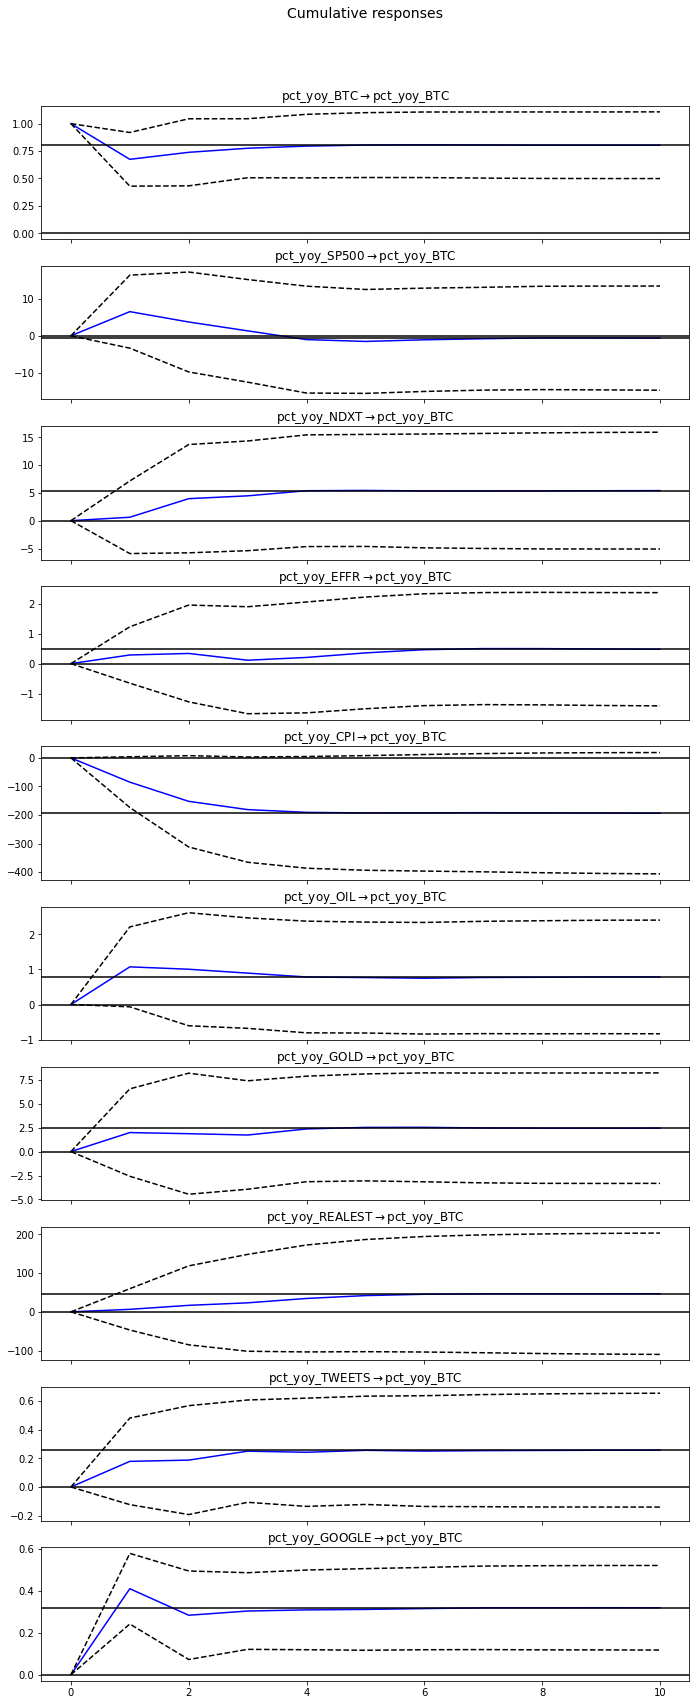

In [26]:
irf_plot_cum=irf.plot_cum_effects(response='pct_yoy_BTC')
irf_plot_cum.set_size_inches(10, 25)
print(irf_plot_cum)

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print((col), ':', round(val, 2))
#around 2 is ok

FORECAST PART

In [ ]:
#forecast
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

In [ ]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['ln_BTC_forecast', 'ln_SP500_forecast', 'ln_NDXT_forecast', 'ln_EFFR_forecast',
                   'ln_CPI_forecast', 'ln_OIL_forecast', 'ln_GOLD_forecast', 'ln_REALEST_forecast', 'ln_TWEETS_forecast', 'ln_GOOGLE_forecast']]

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();